In [8]:
import tensorflow as tf

## TensorFlow
TensorFlow is an open-source software library for dataflow programming across a range of tasks. It is a symbolic math library, and is also used for machine learning applications such as neural networks. It is used for both research and production at Google, often replacing its closed-source predecessor, DistBelief.

TensorFlow computations are expressed as stateful dataflow graphs. The name TensorFlow derives from the operations that such neural networks perform on multidimensional data arrays. These arrays are referred to as "tensors". In June 2016, Dean stated that 1,500 repositories on GitHub mentioned TensorFlow, of which only 5 were from Google.

TensorFlow is cross-platform. It runs on nearly everything: GPUs and CPUs—including mobile and embedded platforms—and even tensor processing units (TPUs), which are specialized hardware to do tensor math on.

![title](1tensorflow.png)


The TensorFlow distributed execution engine abstracts away the many supported devices and provides a high performance-core implemented in C++ for the TensorFlow platform.
On top of that sit the Python and C++ frontends (with more to come). The Layers API provides a simpler interface for commonly used layers in deep learning models. On top of that sit higher-level APIs, including Keras (more on the Keras.io site) and the Estimator API, which makes training and evaluating distributed models easier.

## Graphs
Machine learning can get complex quickly, and deep learning models can become large. For many model graphs, you need distributed training to be able to iterate within a reasonable time frame. And, you'll typically want the models you develop to deploy to multiple platforms.

With the current version of TensorFlow, you write code to build a computation graph, then execute it. The graph is a data structure that fully describes the computation you want to perform. This has lots of advantages:

It's portable, as the graph can be executed immediately or saved to use later, and it can run on multiple platforms: CPUs, GPUs, TPUs, mobile, embedded. Also, it can be deployed to production without having to depend on any of the code that built the graph, only the runtime necessary to execute it.
It's transformable and optimizable, as the graph can be transformed to produce a more optimal version for a given platform. Also, memory or compute optimizations can be performed and trade-offs made between them. This is useful, for example, in supporting faster mobile inference after training on larger machines.
Support for distributed execution
TensorFlow's high-level APIs, in conjunction with computation graphs, enable a rich and flexible development environment and powerful production capabilities in the same framework.

## Constants 
https://www.tensorflow.org/api_docs/python/tf/constant

In [9]:
sess=tf.Session()
a=tf.constant(6)
b=tf.constant(3)
a   # contains a constant tensor see type

<tf.Tensor 'Const_6:0' shape=() dtype=int32>

In [10]:
#to print we should run the session 
sess.run(a)

6

In [11]:
# constants can be 2D matrices, strings etc.
a1 = tf.constant([[3,3]])
a2 = tf.constant([[3,2],[3,3]])
res = tf.matmul(a1, a2)
sess.run(res)


array([[18, 15]])

In [12]:
a=tf.constant(8)
a=tf.constant(28) # is perfectly valid as a new tensor object is created here 

sess.run(a)

28

## Variables
https://www.tensorflow.org/api_docs/python/tf/Variable

A variable maintains state in the graph across calls to run(). You add a variable to the graph by constructing an instance of the class Variable.

In [13]:
var1= tf.Variable(100)
sess.run(var1) # generates an error because a variable is supposed to be explicitly intialized 

FailedPreconditionError: Attempting to use uninitialized value Variable_1
	 [[Node: _retval_Variable_1_0_0 = _Retval[T=DT_INT32, index=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Variable_1)]]

In [14]:
sess.run(tf.global_variables_initializer()) # initializing global variable var1 now
temp=var1.assign(122)  #assign will assign values to variable
sess.run(var1)  #var1 containes old value because assign is not run yet in session 

100

In [15]:
sess.run(temp) # now var1 has new value

122

In [16]:
var1 = tf.Variable(100)
var2 = tf.Variable(200)

sess.run(tf.global_variables_initializer())
var3 = tf.Variable(300)   ## this is created after global initializer was called hence error is generated in next line
sess.run(var3)

FailedPreconditionError: Attempting to use uninitialized value Variable_4
	 [[Node: _retval_Variable_4_0_0 = _Retval[T=DT_INT32, index=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Variable_4)]]

## Placeholders 
https://www.tensorflow.org/api_docs/python/tf/placeholder

Placeholders are used when values are supposed to be provided later. 

In [17]:
x =tf.placeholder(tf.int32) #type is supposed to be specified 
y =tf.placeholder(tf.int32)

In [18]:
v = 3 * x
sess = tf.Session()
sess.run(v)  # error is generated as v is supposed to use values present in x, which are not provided yet 

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype int32
	 [[Node: Placeholder = Placeholder[dtype=DT_INT32, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[Node: mul/_3 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_7_mul", tensor_type=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder', defined at:
  File "C:\Users\HP-PC\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\HP-PC\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\HP-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\HP-PC\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\HP-PC\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\HP-PC\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\HP-PC\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\HP-PC\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\HP-PC\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\HP-PC\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\HP-PC\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\HP-PC\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\HP-PC\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\HP-PC\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\HP-PC\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\HP-PC\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\HP-PC\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\HP-PC\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\HP-PC\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\HP-PC\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-2439f9071f3e>", line 1, in <module>
    x =tf.placeholder(tf.int32) #type is supposed to be specified
  File "C:\Users\HP-PC\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1808, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\HP-PC\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 5835, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\Users\HP-PC\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\HP-PC\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3392, in create_op
    op_def=op_def)
  File "C:\Users\HP-PC\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype int32
	 [[Node: Placeholder = Placeholder[dtype=DT_INT32, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[Node: mul/_3 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_7_mul", tensor_type=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [19]:
# to pass values we need to provide a dictionary 
sess.run(v,feed_dict={x:20}) # see it only requires the values which would be required to compute v hence y value was not asked 

60

In [20]:
# we can create multidimensional placeholders also 
x =tf.placeholder(tf.int32,shape=(2,2))
y = x * tf.constant(12)
sess.run(y, feed_dict={x:[[1,2], [4,5]]})

array([[12, 24],
       [48, 60]])

# Neural Networks using TensorFlow 

In [21]:

import numpy as np
import matplotlib.pyplot as plt

In [22]:
from tensorflow.examples.tutorials.mnist import  input_data
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [23]:
mnist.train.images.shape

(55000, 784)

In [24]:
mnist.train.labels.shape

(55000, 10)

In [25]:
image1=mnist.train.images[4119]
image1=np.array(image1,float)
image1=image1.reshape((28,28))

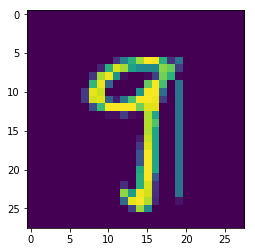

In [26]:
plt.imshow(image1)
plt.show()

In [27]:
n_input=784
n_hl1=256
n_hl2=256
n_output=10

weights={
    'h1':tf.Variable(tf.random_normal(shape=(n_input,n_hl1))),  # weight matrix for layer 1
    'h2':tf.Variable(tf.random_normal(shape=(n_hl1,n_hl2))),    # weight matrix for layer 2
    'out':tf.Variable(tf.random_normal(shape=(n_hl2,n_output))) # weight matrix for layer 3
}
biases={
    'h1':tf.Variable(tf.random_normal(shape=(n_hl1,))),         # biases for layer 1
    'h2':tf.Variable(tf.random_normal(shape=(n_hl2,))),         # biases for layer 1
    'out':tf.Variable(tf.random_normal(shape=(n_output,)))      # biases for layer 1
}

In [28]:
def fwd_prop(x,weights,biases):
    layer1=tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    layer1=tf.nn.relu(layer1)  #activation 
    
    layer2=tf.add(tf.matmul(layer1,weights['h2']),biases['h2'])
    layer2=tf.nn.relu(layer2)
    
    output=tf.add(tf.matmul(layer2,weights['out']),biases['out'])
    return output

In [29]:


x=tf.placeholder('float',[None,n_input])      #since no. of input instance is different for training and testing
y=tf.placeholder(tf.int32,[None,n_output])

pred=fwd_prop(x,weights,biases)




In [30]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred,labels=y)) #logits is because of multiple classes 

In [31]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)

In [32]:
optimize=optimizer.minimize(cost)
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [33]:
batch_size=100
for i in range(25):
    num_batches=mnist.train.num_examples//batch_size
    total_cost=0
    for j in range(num_batches):
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        c,_=sess.run([cost,optimize],feed_dict={x:batch_x,y:batch_y})
        total_cost+=c
    print(total_cost)    

27096.071947574615
5218.45552513659
2880.3181716933423
1892.3022836896976
1566.6121447227915
1283.443366176928
1040.943579693328
1115.9954430881683
902.8889724455083
772.7058127981663
676.0550456542998
735.7091998429289
494.25867169706123
579.5282406869514
480.28201700966906
403.0543620557193
421.90908539430575
398.2288451842894
378.7047179486251
369.822000171029
269.7220260771506
249.0626928166688
192.33130354584696
254.8867835477498
242.2969108046155


In [34]:
predictions=tf.argmax(pred,1)
true_labels=tf.argmax(y,1)
correct_preds=tf.equal(predictions,true_labels)
correct_ones=sess.run(correct_preds,feed_dict={x:mnist.test.images,y:mnist.test.labels})
correct_ones.sum()

9673

In [35]:
tf.trainable_variables() #checking trainable variables 

[<tf.Variable 'Variable:0' shape=() dtype=int32_ref>,
 <tf.Variable 'Variable_1:0' shape=() dtype=int32_ref>,
 <tf.Variable 'Variable_2:0' shape=() dtype=int32_ref>,
 <tf.Variable 'Variable_3:0' shape=() dtype=int32_ref>,
 <tf.Variable 'Variable_4:0' shape=() dtype=int32_ref>,
 <tf.Variable 'Variable_5:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_6:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_7:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_8:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_9:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_10:0' shape=(10,) dtype=float32_ref>]

In [36]:
#non sequential model has two simultaneous inputs of two diiferent types that require different NN then at some point their o/p combine